In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.integrate import quad

In [2]:
WinRate_df = pd.read_csv("MarvelRivals_WinRate_Matrix.csv", index_col=0)
NumMatches_df = pd.read_csv("MarvelRivals_NumMatches_Matrix.csv", index_col=0)

min_value = WinRate_df.min().min()
max_value = WinRate_df.max().max()
min_value

np.float64(30.74)

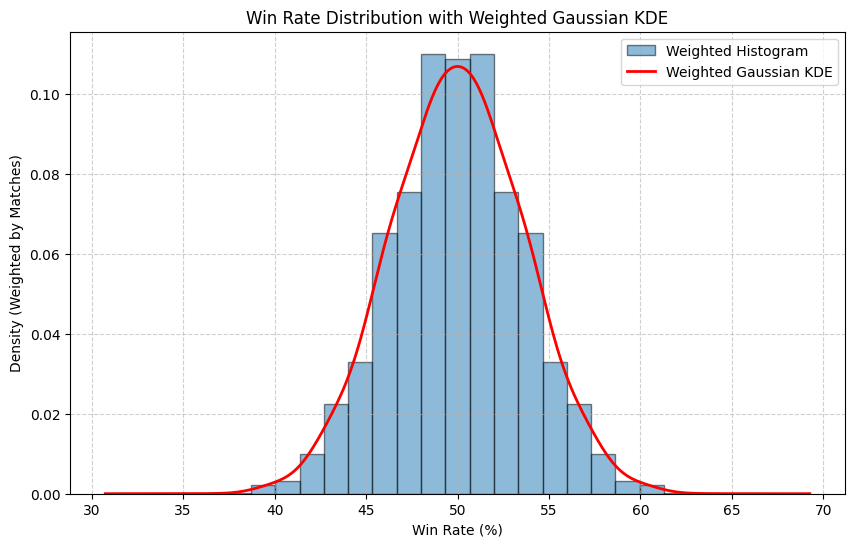

In [3]:
win_rates = WinRate_df.astype(float).values.flatten()
num_matches = NumMatches_df.astype(float).values.flatten()

valid_indices = np.isfinite(win_rates) & np.isfinite(num_matches)
win_rates = win_rates[valid_indices]
num_matches = num_matches[valid_indices]

kde = gaussian_kde(win_rates, weights=num_matches)

x_values = np.linspace(min_value, max_value, 500)
kde_values = kde(x_values)

plt.figure(figsize=(10, 6))
plt.hist(win_rates, bins=np.linspace(min_value, max_value, 30), weights=num_matches, edgecolor='black', alpha=0.5, density=True, label="Weighted Histogram")

plt.plot(x_values, kde_values, color='red', linewidth=2, label="Weighted Gaussian KDE")

plt.xlabel("Win Rate (%)")
plt.ylabel("Density (Weighted by Matches)")
plt.title("Win Rate Distribution with Weighted Gaussian KDE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [4]:
def utility_score(kde, winrate, min_value, max_value):
    total_cdf, _ = quad(kde, min_value, max_value)
    cdf, _ = quad(kde, min_value, winrate)
    utility = ((cdf - (total_cdf / 2)) / (total_cdf / 2))
    return round(utility, 2)


utility_score(kde, 33, min_value, max_value)

-1.0

In [5]:
Payoff_df = WinRate_df.copy()

for row_hero in WinRate_df.index:
    for col_hero in WinRate_df.columns:
        winrate = WinRate_df.at[row_hero, col_hero]  # Get the win rate
        Payoff_df.at[row_hero, col_hero] = utility_score(kde, winrate, min_value, max_value)

Payoff_df = Payoff_df.astype(float)

In [6]:
Payoff_df.to_csv("MarvelRivals_Payoff_Matrix.csv")
Payoff_df

,Captain America,Doctor Strange,Groot,Hulk,Magneto,Peni Parker,The Thing,Thor,Venom,Black Panther,...,Winter Soldier,Wolverine,Adam Warlock,Cloak & Dagger,Invisible Woman,Jeff The Land Shark,Loki,Luna Snow,Mantis,Rocket Raccoon
Captain America,-0.00,0.59,0.54,0.39,0.70,-0.04,0.44,0.22,0.60,0.17,...,0.51,0.56,0.39,0.80,0.79,0.93,0.11,0.87,-0.11,-0.32
Doctor Strange,-0.59,-0.00,-0.06,-0.44,0.20,-0.60,-0.39,-0.44,0.02,-0.52,...,-0.08,-0.22,-0.46,0.53,0.24,0.51,-0.43,0.36,-0.64,-0.77
Groot,-0.54,0.06,-0.00,-0.37,0.43,-0.53,-0.18,-0.40,0.15,-0.37,...,0.03,0.36,-0.17,0.54,0.34,0.69,-0.30,0.66,-0.47,-0.60
Hulk,-0.39,0.44,0.37,-0.00,0.49,-0.31,0.14,-0.21,0.47,-0.19,...,0.15,0.40,-0.08,0.75,0.63,0.82,-0.17,0.72,-0.24,-0.68
Magneto,-0.70,-0.20,-0.43,-0.49,-0.00,-0.74,-0.54,-0.65,-0.16,-0.68,...,-0.34,-0.63,-0.67,0.32,0.04,0.58,-0.52,0.30,-0.78,-0.89
Peni Parker,0.04,0.60,0.53,0.31,0.74,-0.00,0.40,0.25,0.32,-0.56,...,0.54,0.62,0.20,0.83,0.76,0.97,0.22,0.90,-0.33,-0.39
The Thing,-0.44,0.39,0.18,-0.14,0.54,-0.40,-0.00,-0.12,0.21,-0.39,...,0.28,-0.44,-0.19,0.67,0.58,0.88,-0.08,0.63,-0.53,-0.69
Thor,-0.22,0.44,0.40,0.21,0.65,-0.25,0.12,-0.00,0.45,-0.00,...,0.27,0.58,0.07,0.78,0.68,0.93,0.06,0.77,-0.30,-0.50
Venom,-0.60,-0.02,-0.15,-0.47,0.16,-0.32,-0.21,-0.45,-0.00,-0.29,...,-0.13,-0.01,-0.45,0.36,0.32,0.74,-0.34,0.53,-0.74,-0.87
Black Panther,-0.17,0.52,0.37,0.19,0.68,0.56,0.39,0.00,0.29,-0.00,...,0.39,0.05,0.14,0.79,0.77,0.92,0.30,0.85,-0.29,-0.62
